In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
#csv files
mouse_metadata_path = "mouse_metadata.csv"
study_results_path = "pymaceuticals_data.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
#merge csv files
data_complete = pd.merge(mouse_metadata, study_results, how="left", on = ["Mouse ID", "Mouse ID"])

In [5]:
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
#total mouse count
total_mice = data_complete["Mouse ID"].nunique()
total_mice

249

In [7]:
#identify duplicate data
duplicate_data = data_complete.loc[data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(duplicate_data)

['g989']


In [24]:
#drop duplicate data
data_complete2 = data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"])
data_completexx=data_complete2.loc[data_complete2["Mouse ID"] == "g989"]
data_completexx

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [20]:
#total mouse count
total_mice2 = data_complete2["Mouse ID"].nunique()
total_mice2

249

In [26]:
#mouse count per drug regimen
total_mice_per_regimen = data_complete2.groupby(["Drug Regimen"]).count()["Mouse ID"]
total_mice_per_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [27]:
#mean tumor volume per drug regimen
mean_tumor_volume_per_regimen = data_complete2.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor_volume_per_regimen

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [28]:
#median tumor volume per drug regimen
median_tumor_volume_per_regimen = data_complete2.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor_volume_per_regimen

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [29]:
#variance tumor volume per drug regimen
variance_tumor_volume_per_regimen = data_complete2.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance_tumor_volume_per_regimen

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [30]:
#standard deviation of tumor volume per drug regimen
std_tumor_volume_per_regimen = data_complete2.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_tumor_volume_per_regimen

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [31]:
#standard error measure of tumor volume per drug regimen
sem_tumor_volume_per_regimen = data_complete2.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem_tumor_volume_per_regimen

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [32]:
stats_df = pd.DataFrame({"Total Mice":total_mice_per_regimen,
                        "Mean":mean_tumor_volume_per_regimen,
                        "Median":median_tumor_volume_per_regimen,
                        "Variance":variance_tumor_volume_per_regimen,
                        "Std Dev":std_tumor_volume_per_regimen,
                        "SEM":sem_tumor_volume_per_regimen})
stats_df

,Total Mice,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
stats2_df = data_complete2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})
stats2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [36]:
data_complete2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
number_mice = data_complete2["Drug Regimen"].value_counts()
number_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

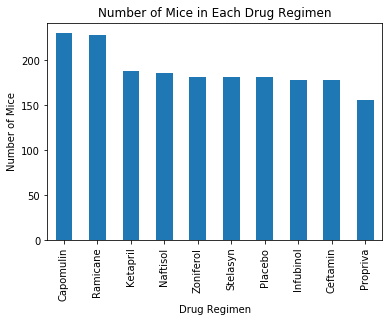

In [63]:
#bar chart using pandas
number_mice.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice in Each Drug Regimen")
plt.show()

In [42]:
number_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [43]:
x_values = number_mice.index.values
x_values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [44]:
y_values = number_mice.values
y_values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 156], dtype=int64)

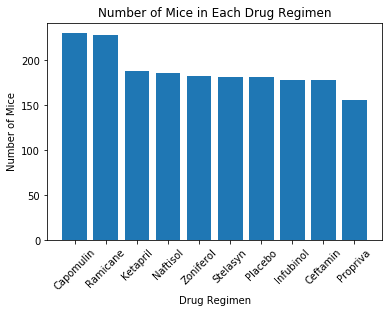

In [66]:
plt.bar(x_values, y_values)
plt.xticks(rotation = 45)
plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [48]:
gender = data_complete2["Sex"].value_counts()
gender

Male      958
Female    930
Name: Sex, dtype: int64

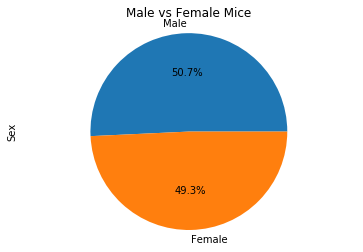

In [62]:
gender.plot(kind = "pie", autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Male vs Female Mice")
plt.show()

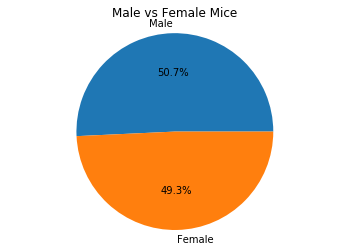

In [61]:
labels = ["Male", "Female"]
plt.pie(gender, labels = labels, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Male vs Female Mice")
plt.show()

In [51]:
max_tumor = data_complete2.groupby(["Mouse ID"]).max()
max_tumor

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [52]:
max_tumor=max_tumor.reset_index()

In [53]:
max_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [55]:
Capomulin = max_tumor.loc[max_tumor["Drug Regimen"] == 'Capomulin']["Tumor Volume (mm3)"]
Capomulin

19     45.651331
24     45.000000
61     45.000000
64     46.304003
66     46.809225
81     47.685963
84     45.595685
86     48.158209
88     46.408361
109    48.070452
116    46.154737
122    45.000000
125    46.414518
163    46.539206
164    45.781746
170    47.373423
175    45.000000
181    45.000000
184    46.749006
193    47.212200
205    45.704434
209    45.000000
221    45.893720
227    45.473753
240    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [56]:
Ramicane = max_tumor.loc[max_tumor["Drug Regimen"] == 'Ramicane']["Tumor Volume (mm3)"]
Ramicane

6      45.466677
7      45.000000
10     45.000000
12     46.910892
33     45.722279
37     46.940945
45     45.000000
52     46.409084
70     45.851531
77     45.000000
78     45.000000
92     45.252534
94     46.343832
97     45.000000
120    45.000000
127    45.521875
158    45.766111
159    46.585433
167    45.625802
169    45.568211
178    45.000000
191    47.622816
218    45.000000
236    46.378092
245    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [57]:
Infubinol = max_tumor.loc[max_tumor["Drug Regimen"] == 'Infubinol']["Tumor Volume (mm3)"]
Infubinol

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     45.000000
41     60.969711
50     62.435404
56     60.918767
79     67.289621
98     66.196912
102    62.117279
124    47.010364
130    60.165180
142    55.629428
143    45.699331
154    54.656549
171    55.650681
198    46.250112
201    54.048608
203    51.542431
212    50.005138
217    58.268442
234    67.685569
246    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [58]:
Ceftamin = max_tumor.loc[max_tumor["Drug Regimen"] == 'Ceftamin']["Tumor Volume (mm3)"]
Ceftamin

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [69]:
data = [Capomulin, Ramicane, Infubinol, Ceftamin]

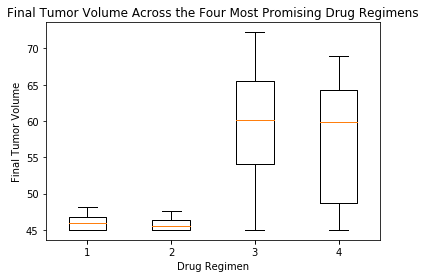

In [80]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Across the Four Most Promising Drug Regimens")
plt.xticks([1, 2, 3, 4]), ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume")
ax1.boxplot(data)
plt.show()

In [82]:
Capomulin_quartiles = Capomulin.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq - Capomulin_lowerq
Capomulin_lower_bound = round(Capomulin_lowerq - (1.5*Capomulin_iqr),2)
Capomulin_upper_bound = round(Capomulin_upperq + (1.5*Capomulin_iqr),2)

print(f"The lower quartile of Capomulin is: {Capomulin_lowerq}.")
print(f"The upper quartile of Capomulin is: {Capomulin_upperq}.")
print(f"The interquartile range of Capomulin is: {Capomulin_iqr}.")
print(f"The median of Capomulin is: {Capomulin_quartiles[0.5]}.")
print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")


The lower quartile of Capomulin is: 45.0.
The upper quartile of Capomulin is: 46.74900552.
The interquartile range of Capomulin is: 1.7490055199999972.
The median of Capomulin is: 45.89372032.
Values below 42.38 could be outliers.
Values above 49.37 could be outliers.


In [83]:
Ramicane_quartiles = Ramicane.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq
Ramicane_lower_bound = round(Ramicane_lowerq - (1.5*Ramicane_iqr),2)
Ramicane_upper_bound = round(Ramicane_upperq + (1.5*Ramicane_iqr),2)

print(f"The lower quartile of Ramicane is: {Ramicane_lowerq}.")
print(f"The upper quartile of Ramicane is: {Ramicane_upperq}.")
print(f"The interquartile range of Ramicane is: {Ramicane_iqr}.")
print(f"The median of Ramicane is: {Ramicane_quartiles[0.5]}.")
print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")

The lower quartile of Ramicane is: 45.0.
The upper quartile of Ramicane is: 46.34383237.
The interquartile range of Ramicane is: 1.3438323700000012.
The median of Ramicane is: 45.52187471.
Values below 42.98 could be outliers.
Values above 48.36 could be outliers.


In [84]:
Infubinol_quartiles = Infubinol.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq
Infubinol_lower_bound = round(Infubinol_lowerq - (1.5*Infubinol_iqr),2)
Infubinol_upper_bound = round(Infubinol_upperq + (1.5*Infubinol_iqr),2)

print(f"The lower quartile of Infubinol is: {Infubinol_lowerq}.")
print(f"The upper quartile of Infubinol is: {Infubinol_upperq}.")
print(f"The interquartile range of Infubinol is: {Infubinol_iqr}.")
print(f"The median of Infubinol is: {Infubinol_quartiles[0.5]}.")
print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769.
The upper quartile of Infubinol is: 65.52574285.
The interquartile range of Infubinol is: 11.477135160000003.
The median of Infubinol is: 60.16518046.
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [85]:
Ceftamin_quartiles = Ceftamin.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq
Ceftamin_lower_bound = round(Ceftamin_lowerq - (1.5*Ceftamin_iqr),2)
Ceftamin_upper_bound = round(Ceftamin_upperq + (1.5*Ceftamin_iqr),2)

print(f"The lower quartile of Ceftamin is: {Ceftamin_lowerq}.")
print(f"The upper quartile of Ceftamin is: {Ceftamin_upperq}.")
print(f"The interquartile range of Ceftamin is: {Ceftamin_iqr}.")
print(f"The median of Ceftamin is: {Ceftamin_quartiles[0.5]}.")
print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785.
The upper quartile of Ceftamin is: 64.29983003.
The interquartile range of Ceftamin is: 15.577752179999997.
The median of Ceftamin is: 59.85195552.
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


In [86]:
Capomulin_mouse = data_complete2.loc[data_complete2["Mouse ID"] == 'x401']["Tumor Volume (mm3)"]
Capomulin_mouse

20    45.000000
21    45.473753
22    39.113891
23    39.776250
24    36.065835
25    36.617120
26    32.915292
27    30.206825
28    28.167397
29    28.484033
Name: Tumor Volume (mm3), dtype: float64

In [87]:
time = data_complete2.loc[data_complete2["Mouse ID"] == 'x401']["Timepoint"]
time

20     0
21     5
22    10
23    15
24    20
25    25
26    30
27    35
28    40
29    45
Name: Timepoint, dtype: int64

In [89]:
x_axis = time.values
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [90]:
y_axis = Capomulin_mouse.values
y_axis

array([45.        , 45.47375302, 39.11389068, 39.77625003, 36.06583471,
       36.61712031, 32.91529186, 30.20682488, 28.16739732, 28.48403281])

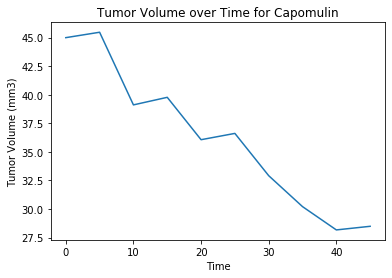

In [92]:
plt.plot(x_axis, y_axis)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time for Capomulin")
plt.show()

In [103]:
mouse_weight = data_complete2.loc[data_complete2["Drug Regimen"] == "Capomulin"]["Weight (g)"]
mouse_weight

10      17
11      17
12      17
13      17
14      17
        ..
440     24
1452    25
1453    25
1454    25
1455    25
Name: Weight (g), Length: 230, dtype: int64

In [109]:
average_tumor = data_complete2.groupby(["Drug Regimen","Weight (g)"]).mean()["Tumor Volume (mm3)"]
average_tumor

Drug Regimen  Weight (g)
Capomulin     15            36.182040
              17            37.214133
              19            41.182391
              20            39.141053
              21            42.088700
                              ...    
Zoniferol     26            54.079939
              27            52.015995
              28            54.257071
              29            52.676301
              30            49.641856
Name: Tumor Volume (mm3), Length: 67, dtype: float64

In [112]:
mouse_weight_Capomulin = average_tumor.loc('index == Capomulin')
mouse_weight_Capomulin

ValueError: No axis named index == Capomulin for object type <class 'pandas.core.series.Series'>

In [110]:
mouse_weight_Capomulin = average_tumor.loc[average_tumor["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
mouse_weight_Capomulin

KeyError: 'Drug Regimen'